In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np


In [2]:
df = pd.read_csv("C:\\Users\\M4\\Desktop\\Turbine_Data.csv")

In [3]:
df

,Unnamed: 0,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
0,2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
1,2017-12-31 00:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2,2017-12-31 00:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
3,2017-12-31 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
4,2017-12-31 00:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118219,2020-03-30 23:10:00+00:00,70.044465,27.523741,45.711129,1.515669,1.950088,1.950088,0.0,59.821165,55.193793,...,58.148777,39.008931,36.476562,178.0,13.775785,9.234004,2.0,G01,178.0,3.533445
118220,2020-03-30 23:20:00+00:00,40.833474,27.602882,45.598573,1.702809,2.136732,2.136732,0.0,59.142038,54.798545,...,57.550367,39.006759,36.328125,178.0,8.088928,9.229370,2.0,G01,178.0,3.261231
118221,2020-03-30 23:30:00+00:00,20.777790,27.560925,45.462045,1.706214,2.139664,2.139664,0.0,58.439439,54.380456,...,57.099335,39.003815,36.131944,178.0,4.355978,9.236802,2.0,G01,178.0,3.331839
118222,2020-03-30 23:40:00+00:00,62.091039,27.810472,45.343827,1.575352,2.009781,2.009781,0.0,58.205413,54.079014,...,56.847239,39.003815,36.007805,190.0,12.018077,9.237374,2.0,G01,190.0,3.284468


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118224 entries, 0 to 118223
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    118224 non-null  object 
 1   ActivePower                   94750 non-null   float64
 2   AmbientTemperatue             93817 non-null   float64
 3   BearingShaftTemperature       62518 non-null   float64
 4   Blade1PitchAngle              41996 non-null   float64
 5   Blade2PitchAngle              41891 non-null   float64
 6   Blade3PitchAngle              41891 non-null   float64
 7   ControlBoxTemperature         62160 non-null   float64
 8   GearboxBearingTemperature     62540 non-null   float64
 9   GearboxOilTemperature         62438 non-null   float64
 10  GeneratorRPM                  62295 non-null   float64
 11  GeneratorWinding1Temperature  62427 non-null   float64
 12  GeneratorWinding2Temperature  62449 non-null

In [5]:
df.isna().sum()

Unnamed: 0                          0
ActivePower                     23474
AmbientTemperatue               24407
BearingShaftTemperature         55706
Blade1PitchAngle                76228
Blade2PitchAngle                76333
Blade3PitchAngle                76333
ControlBoxTemperature           56064
GearboxBearingTemperature       55684
GearboxOilTemperature           55786
GeneratorRPM                    55929
GeneratorWinding1Temperature    55797
GeneratorWinding2Temperature    55775
HubTemperature                  55818
MainBoxTemperature              55717
NacellePosition                 45946
ReactivePower                   23476
RotorRPM                        56097
TurbineStatus                   55316
WTG                                 0
WindDirection                   45946
WindSpeed                       23629
dtype: int64

In [6]:
df["ControlBoxTemperature"].value_counts() , df["WTG"].value_counts()

(0.0    62160
 Name: ControlBoxTemperature, dtype: int64,
 G01    118224
 Name: WTG, dtype: int64)

In [7]:
df.drop(columns = ['WTG','ControlBoxTemperature','Unnamed: 0'], inplace = True) #We drop WTG because every value was the same


In [8]:
columns = ['AmbientTemperatue' ,
           'BearingShaftTemperature',
           'Blade1PitchAngle', 
           'Blade2PitchAngle' ,
           'Blade3PitchAngle',
           'GearboxBearingTemperature',
           'GearboxOilTemperature',
           'GeneratorRPM','GeneratorWinding1Temperature','GeneratorWinding2Temperature',
           'HubTemperature',
           'MainBoxTemperature',
           'NacellePosition',
           'ReactivePower',
           'RotorRPM',
           'TurbineStatus', 
           'WindDirection',
           'WindSpeed']
for n in columns:
    df[n].fillna(df[n].median(),inplace = True)
for d in df:
    df.dropna(axis=0,how = 'any',inplace = True)

In [9]:
df.isna().sum()


ActivePower                     0
AmbientTemperatue               0
BearingShaftTemperature         0
Blade1PitchAngle                0
Blade2PitchAngle                0
Blade3PitchAngle                0
GearboxBearingTemperature       0
GearboxOilTemperature           0
GeneratorRPM                    0
GeneratorWinding1Temperature    0
GeneratorWinding2Temperature    0
HubTemperature                  0
MainBoxTemperature              0
NacellePosition                 0
ReactivePower                   0
RotorRPM                        0
TurbineStatus                   0
WindDirection                   0
WindSpeed                       0
dtype: int64

In [10]:
df.shape


(94750, 19)

In [11]:
target=['ActivePower']
X = df[columns]
Y= df[target]

In [12]:
df

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
144,-5.357727,23.148729,42.910877,0.394399,0.888977,0.888977,64.834662,57.196089,1124.860720,65.788800,65.004946,37.003815,39.491310,8.000000,-9.960830,10.098702,2.0,8.000000,2.279088
145,-5.822360,23.039754,42.910877,0.394399,0.888977,0.888977,64.834662,57.196089,1124.860720,65.788800,65.004946,37.003815,39.491310,300.428571,-9.628441,10.098702,2.0,300.428571,2.339343
146,-5.279409,22.948703,42.910877,0.394399,0.888977,0.888977,64.834662,57.196089,1124.860720,65.788800,65.004946,37.003815,39.491310,340.000000,-9.491235,10.098702,2.0,340.000000,2.455610
147,-4.648054,22.966851,42.910877,0.394399,0.888977,0.888977,64.834662,57.196089,1124.860720,65.788800,65.004946,37.003815,39.491310,345.000000,-9.856136,10.098702,2.0,345.000000,2.026754
148,-4.684632,22.936520,42.910877,0.394399,0.888977,0.888977,64.834662,57.196089,1124.860720,65.788800,65.004946,37.003815,39.491310,345.000000,-9.745593,10.098702,2.0,345.000000,1.831420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118219,70.044465,27.523741,45.711129,1.515669,1.950088,1.950088,59.821165,55.193793,1029.870744,59.060367,58.148777,39.008931,36.476562,178.000000,13.775785,9.234004,2.0,178.000000,3.533445
118220,40.833474,27.602882,45.598573,1.702809,2.136732,2.136732,59.142038,54.798545,1030.160478,58.452003,57.550367,39.006759,36.328125,178.000000,8.088928,9.229370,2.0,178.000000,3.261231
118221,20.777790,27.560925,45.462045,1.706214,2.139664,2.139664,58.439439,54.380456,1030.137822,58.034071,57.099335,39.003815,36.131944,178.000000,4.355978,9.236802,2.0,178.000000,3.331839
118222,62.091039,27.810472,45.343827,1.575352,2.009781,2.009781,58.205413,54.079014,1030.178178,57.795387,56.847239,39.003815,36.007805,190.000000,12.018077,9.237374,2.0,190.000000,3.284468


In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3, random_state=1)

In [14]:
from sklearn.preprocessing import MinMaxScaler
def scale_data(train, test):
    scaler = MinMaxScaler().fit(train)
    return scaler.transform(train), scaler.transform(test), scaler

In [15]:
X_train, X_test, scaler = scale_data(x_train, x_test)
Y_train, Y_test, scaler = scale_data(y_train, y_test)

In [16]:
X_test.shape

(28425, 18)

In [17]:
Y_test.shape

(28425, 1)

In [25]:
import tensorflow as tf
from Energy_Models.Informer import Informer
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
model = Informer(1,18,1).getModel()

In [26]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 18)]           0         
                                                                 
 token_embedding_2 (TokenEmb  (None, 1, 32)            576       
 edding)                                                         
                                                                 
 encoder_1 (Encoder)         (None, 1, 32)             5376      
                                                                 
 decoder_1 (Decoder)         (None, 1, 32)             8448      
                                                                 
 flatten_1 (Flatten)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                             

In [27]:
X_train=X_train.reshape((X_train.shape[0],1,X_train.shape[1]))
X_test=X_test.reshape((X_test.shape[0],1,X_test.shape[1]))

In [28]:
X_val, X_test, y_val, y_test = train_test_split(X_test, Y_test, test_size=0.50, random_state=42)

In [29]:
X_train.shape , Y_train.shape

((66325, 1, 18), (66325, 1))

In [30]:
model.compile(optimizer='adam', loss ='mae')
history = model.fit(X_train , Y_train, epochs=100, batch_size=128, verbose= 1,validation_data=(X_val, y_val),callbacks=callback)

Epoch 1/100
519/519 [==============================] - 5s 5ms/step - loss: 0.0789 - val_loss: 0.0450
Epoch 2/100
519/519 [==============================] - 2s 4ms/step - loss: 0.0352 - val_loss: 0.0324
Epoch 3/100
519/519 [==============================] - 2s 4ms/step - loss: 0.0306 - val_loss: 0.0228
Epoch 4/100
519/519 [==============================] - 2s 4ms/step - loss: 0.0269 - val_loss: 0.0213
Epoch 5/100
519/519 [==============================] - 2s 4ms/step - loss: 0.0268 - val_loss: 0.0347
Epoch 6/100
519/519 [==============================] - 2s 4ms/step - loss: 0.0248 - val_loss: 0.0204
Epoch 7/100
519/519 [==============================] - 2s 4ms/step - loss: 0.0242 - val_loss: 0.0253
Epoch 8/100
519/519 [==============================] - 2s 4ms/step - loss: 0.0231 - val_loss: 0.0196
Epoch 9/100
519/519 [==============================] - 2s 4ms/step - loss: 0.0218 - val_loss: 0.0190
Epoch 10/100
519/519 [==============================] - 2s 4ms/step - loss: 0.0219 - val_lo

In [31]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error, mean_absolute_percentage_error
def root_mean_squared_error(y_true, y_pred):    
    return np.sqrt(mean_squared_error(y_true, y_pred))
def root_mean_squared_log_error(real, predicted):
    sum=0.0
    for x in range(len(predicted)):
        if predicted[x]<0 or real[x]<0: # check for negative values
            continue
        p = np.log(predicted[x]+1)
        r = np.log(real[x]+1)
        sum = sum + (p - r)**2
    return (sum/len(predicted))**0.5
def print_metrics():
    print('Train   RMSE  value   : %.3f ' % root_mean_squared_error(Y_train, model.predict(X_train)))
    print('Train   MSE   value   : %.3f ' % mean_squared_error(Y_train, model.predict(X_train)))
    print('Train   R2    value   : %.3f ' % r2_score(Y_train,model.predict(X_train)))
    print('Train   MAPE  value   : %.3f ' % mean_absolute_percentage_error(Y_train, model.predict(X_train)))
    print('Train   RMLSE value   : %.3f ' % root_mean_squared_log_error(Y_train, model.predict(X_train)))
    print('Train   MAE   value   : %.3f ' % mean_absolute_error(Y_train, model.predict(X_train)))
    print('---------------------------------------------')
    print('Test    RMSE  value   : %.3f ' % root_mean_squared_error(y_test, model.predict(X_test)))
    print('Test    MSE   value   : %.3f ' % mean_squared_error(y_test, model.predict(X_test)))
    print('Test    R2    value   : %.3f ' % r2_score(y_test, model.predict(X_test)))
    print('Test    MAPE  value   : %.3f ' % mean_absolute_percentage_error(y_test, model.predict(X_test)))
    print('Test    RMLSE value   : %.3f ' % root_mean_squared_log_error(y_test, model.predict(X_test)))
    print('Test    MAE   value   : %.3f ' % mean_absolute_error(y_test, model.predict(X_test)))

In [32]:
print_metrics()

2073/2073 [==============================] - 7s 2ms/step
Train   RMSE  value   : 0.031 
2073/2073 [==============================] - 3s 1ms/step
Train   MSE   value   : 0.001 
2073/2073 [==============================] - 3s 1ms/step
Train   R2    value   : 0.992 
2073/2073 [==============================] - 3s 1ms/step
Train   MAPE  value   : 1497191926.201 
2073/2073 [==============================] - 3s 1ms/step
Train   RMLSE value   : 0.022 
2073/2073 [==============================] - 3s 1ms/step
Train   MAE   value   : 0.014 
---------------------------------------------
445/445 [==============================] - 1s 1ms/step
Test    RMSE  value   : 0.028 
445/445 [==============================] - 1s 1ms/step
Test    MSE   value   : 0.001 
445/445 [==============================] - 1s 1ms/step
Test    R2    value   : 0.993 
445/445 [==============================] - 1s 1ms/step
Test    MAPE  value   : 0.140 
445/445 [==============================] - 1s 1ms/step
Test    RMLSE valu

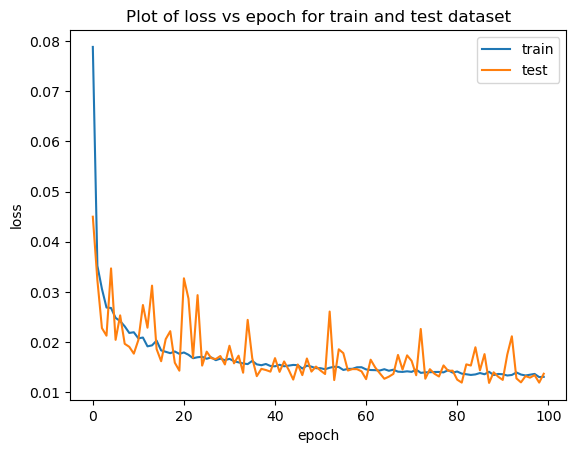

In [33]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()